In [19]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [20]:
# 2. Load data
df = pd.read_csv(r'C:\Users\Branton\Documents\Flatiron\Projects\Vehicle-Sales-Forecasting\data\vehicle_sales_data_2000_2025.csv')
df

,Date,Model,Branch,Units_Sold,Sales_Person,Body_Builder,Financier,Chassis_Number,Order_Date,Invoice_Date,Buying_Price,Selling_Price,Customer_Name,Customer_Location,Payment_Mode
0,2021-12-23,Isuzu FVR,Nairobi,2,Katie Romero,Labh Singh,KCB,JABC882XYZOJ,2021-03-06,2010-01-30,2261674,4738671,Paul Randolph,East Scottton,Cash
1,2008-06-08,Isuzu D-MAX,Eldoret,4,Nicolas Grant,TransAfrica,Equity Bank,JABC445XYZWF,2022-07-12,2008-06-08,3954702,3955105,Whitney Ball,East Jessicahaven,Credit
2,2004-10-07,Isuzu FSR,Mombasa,3,Louis Smith,Rifter,KCB,JABC564XYZxP,2004-02-08,2000-06-17,2771136,6323479,Peter Smith,Donaldshire,Credit
3,2025-08-29,Isuzu D-MAX,Nairobi,3,Karen Krause,Rifter,KCB,JABC886XYZXH,2004-08-28,2013-09-07,3777850,4991965,Shane Reed,Lake Tinaview,Cash
4,2010-04-05,Isuzu NQR Xtra,Chuka,5,Kathleen Pacheco,Rifter,NCBA,JABC388XYZwr,2000-10-27,2008-07-21,4552192,2635797,Charles Vaughn,East Jennifer,Credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2011-03-15,Isuzu FRR90,Eldoret,4,Shannon Thompson,Labh Singh,Equity Bank,JABC977XYZAT,2001-11-17,2007-02-19,5110943,5238909,Thomas Turner,Sandrashire,Credit
9996,2008-01-25,Isuzu FRR90,Meru,4,Michael Miller,Labh Singh,NCBA,JABC028XYZvc,2007-06-25,2004-10-03,3934570,3598690,Daniel Middleton,Harrisside,Cash
9997,2012-07-23,Isuzu D-MAX,Chuka,4,Brittany Rogers,Labh Singh,Equity Bank,JABC712XYZie,2009-07-22,2000-06-01,4332545,4471399,Justin Taylor,West Joseph,Credit
9998,2000-09-04,Isuzu D-MAX,Meru,1,Alicia Gutierrez,Labh Singh,Family Bank,JABC117XYZGc,2014-09-10,2009-06-16,3339145,6283413,Todd Berry,Phelpsport,Credit


In [21]:
print(df.columns.tolist())

['Date', 'Model', 'Branch', 'Units_Sold', 'Sales_Person', 'Body_Builder', 'Financier', 'Chassis_Number', 'Order_Date', 'Invoice_Date', 'Buying_Price', 'Selling_Price', 'Customer_Name', 'Customer_Location', 'Payment_Mode']


In [22]:
# 3. Preprocess
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Selling_Price'].sum().reset_index()
monthly_sales.columns = ['ds', 'y']

C:\Users\Branton\AppData\Local\Temp\ipykernel_19244\1319230725.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Selling_Price'].sum().reset_index()


In [23]:
# 4. Fit model
model = Prophet()
model.fit(monthly_sales)

20:18:01 - cmdstanpy - INFO - Chain [1] start processing
20:18:05 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# 5. Forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

C:\Users\Branton\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


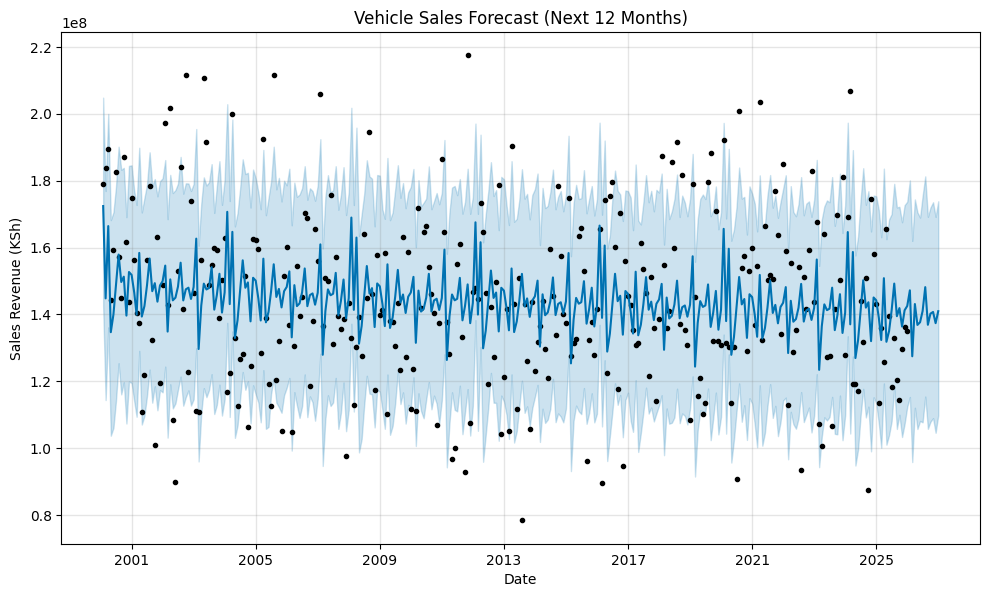

In [25]:
# 8. Plot the forecast
fig1 = model.plot(forecast)
plt.title("Vehicle Sales Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Sales Revenue (KSh)")
plt.grid(True)
plt.show()

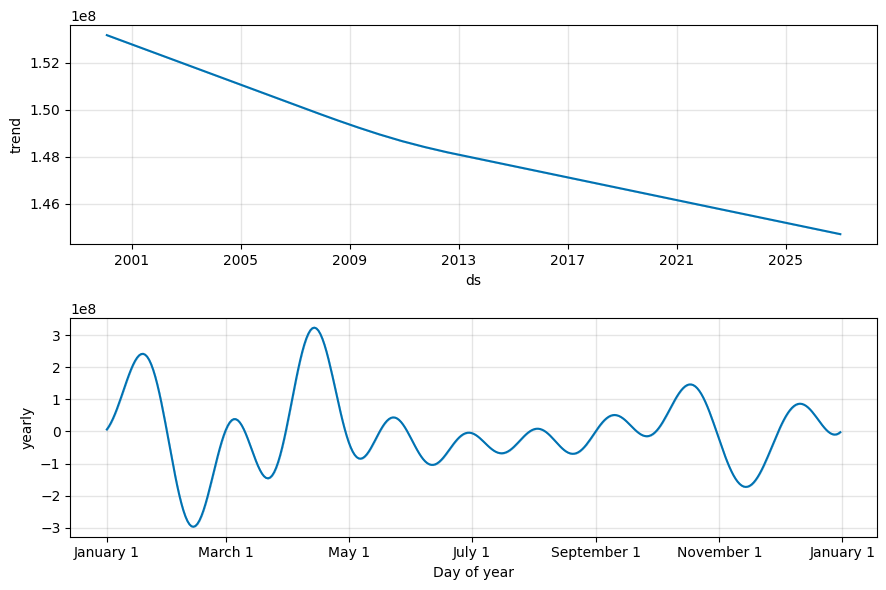

In [26]:
fig2 = model.plot_components(forecast)
plt.show()

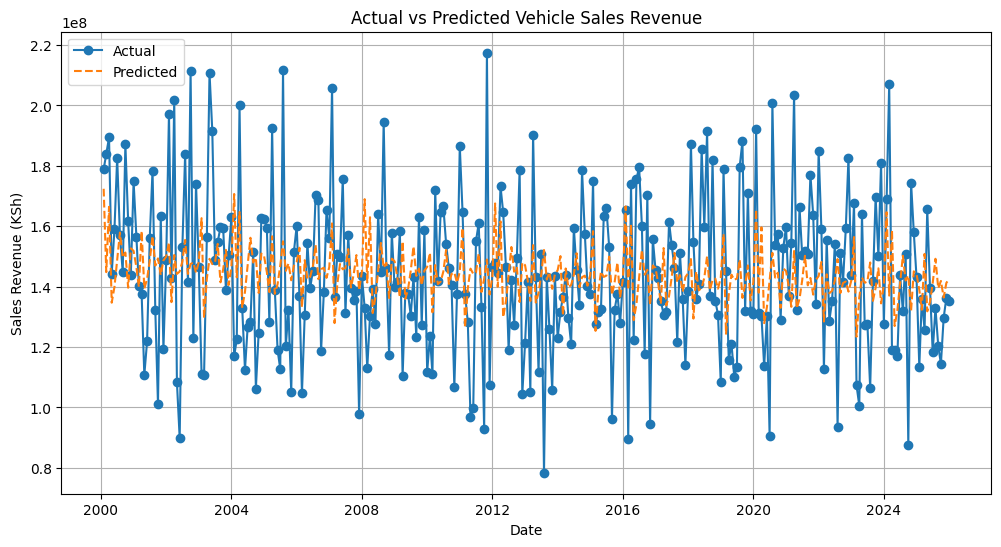

MAE: 19325551.45
RMSE: 24890645.57


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Merge actual and forecasted data on 'ds' (date)
comparison_df = monthly_sales.merge(forecast[['ds', 'yhat']], on='ds', how='left')

# 2. Drop future dates (where 'y' is NaN in actuals)
comparison_df = comparison_df.dropna(subset=['y'])

# 3. Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['ds'], comparison_df['y'], label='Actual', marker='o')
plt.plot(comparison_df['ds'], comparison_df['yhat'], label='Predicted', linestyle='--')
plt.title("Actual vs Predicted Vehicle Sales Revenue")
plt.xlabel("Date")
plt.ylabel("Sales Revenue (KSh)")
plt.legend()
plt.grid(True)
plt.show()

# 4. Print performance metrics
mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])
rmse = np.sqrt(mean_squared_error(comparison_df['y'], comparison_df['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
